In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

In [2]:
data = pd.read_csv("mudah-apartment-kl-selangor.csv")

In [34]:
data['parking'].fillna(0, inplace=True)
data['rooms'].fillna(0, inplace=True)
data['facilities'].fillna("None", inplace=True)
data['additional_facilities'].fillna("None", inplace=True)
data['bathroom'].fillna(0, inplace=True)
data.dropna(subset=['monthly_rent', 'furnished'], inplace=True)


In [35]:
data.isna().sum()

ads_id                      0
prop_name                 944
completion_year          9180
monthly_rent                0
location                    0
property_type               0
rooms                       0
parking                     0
bathroom                    0
size                        0
furnished                   0
facilities                  0
additional_facilities       0
region                      0
dtype: int64

In [37]:
data.drop(columns=['ads_id', 'prop_name', 'completion_year'], inplace=True)

In [43]:
data['monthly_rent']

0        RM 4 200 per month
1        RM 2 300 per month
2        RM 1 000 per month
3        RM 1 700 per month
4        RM 1 299 per month
                ...        
19986    RM 1 200 per month
19987    RM 1 300 per month
19988    RM 1 350 per month
19989    RM 1 200 per month
19990    RM 1 000 per month
Name: monthly_rent, Length: 19986, dtype: object

In [65]:
#get only numerics for the rent
data['monthly_rent'] = data['monthly_rent'].str.replace(" ", '').str.extract('(\d+)')

#get only numerics for the size
data['size'] = data['size'].str.replace(" ", '').str.extract('(\d+)')

In [68]:
data.dtypes

monthly_rent              object
location                  object
property_type             object
rooms                     object
parking                  float64
bathroom                 float64
size                      object
furnished                 object
facilities                object
additional_facilities     object
region                    object
dtype: object

In [70]:
data['monthly_rent'] =  pd.to_numeric(data['monthly_rent'])

In [104]:
data['size'] =  pd.to_numeric(data['size'])

In [106]:
data.dtypes

monthly_rent               int64
location                  object
property_type             object
rooms                     object
parking                  float64
bathroom                 float64
size                       int64
furnished                 object
facilities                object
additional_facilities     object
region                    object
dtype: object

In [108]:
data

,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,facilities,additional_facilities,region
0,4200,Kuala Lumpur - Taman Desa,Condominium,5,2.0,6.0,1842,Fully Furnished,"Minimart, Gymnasium, Security, Playground, Swi...","Air-Cond, Cooking Allowed, Washing Machine",Kuala Lumpur
1,2300,Kuala Lumpur - Cheras,Condominium,3,1.0,2.0,1170,Partially Furnished,"Playground, Parking, Barbeque area, Security, ...","Air-Cond, Cooking Allowed, Near KTM/LRT",Kuala Lumpur
2,1000,Kuala Lumpur - Taman Desa,Apartment,3,0.0,2.0,650,Fully Furnished,"Minimart, Jogging Track, Lift, Swimming Pool",None,Kuala Lumpur
3,1700,Kuala Lumpur - Sentul,Apartment,2,1.0,2.0,743,Partially Furnished,"Parking, Playground, Swimming Pool, Squash Cou...","Cooking Allowed, Near KTM/LRT, Washing Machine",Kuala Lumpur
4,1299,Kuala Lumpur - Mont Kiara,Service Residence,1,1.0,1.0,494,Not Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...",Air-Cond,Kuala Lumpur
...,...,...,...,...,...,...,...,...,...,...,...
19986,1200,Selangor - Kajang,Apartment,3.0,0.0,2.0,1000,Partially Furnished,"Security, Parking, Lift, Minimart, Multipurpos...",Near KTM/LRT,Selangor
19987,1300,Selangor - Bandar Saujana Putra,Service Residence,4.0,2.0,3.0,1427,Partially Furnished,"Jogging Track, Barbeque area, Playground, Swim...","Air-Cond, Cooking Allowed",Selangor
19988,1350,Selangor - Kajang,Condominium,3.0,2.0,2.0,1270,Partially Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...","Air-Cond, Cooking Allowed, Washing Machine",Selangor
19989,1200,Selangor - Cyberjaya,Service Residence,3.0,1.0,2.0,1100,Fully Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...","Cooking Allowed, Washing Machine",Selangor


In [109]:
data.to_csv("Rental_Price_cleaned.csv")

In [6]:
import copy

In [3]:
data = pd.read_csv("Rental_Price_cleaned.csv")

In [4]:
data.drop(columns=['Unnamed: 0'], inplace=True)
# data['additional_facilities'] = data['additional_facilities'].str.split(",")
# data['facilities'] = data['facilities'].str.split(",")
data['location'] = data['location'].str.replace("Kuala Lumpur - ", '')
data['location']= data['location'].str.replace("Selangor - ", '')

In [7]:
data_cat = copy.deepcopy(data)
data_codes = copy.deepcopy(data)

In [8]:
#cnvert type of location to categorical
cat_cols = ['location', 'property_type', 'rooms', 'furnished', 'region']
for cols in cat_cols:
    data_cat[cols] = data_cat[cols].astype('category')
    data_codes[cols] = data_codes[cols].astype('category').cat.codes

In [9]:
data_codes = data_codes.drop(columns=['facilities', 'additional_facilities'])

In [10]:
abs_corr = np.abs(data_codes.corr()['monthly_rent']).sort_values()
corr = data_codes.corr()['monthly_rent'].sort_values()

Text(0.5, 1.0, 'Correlation of Rental Attributes with Monthly Rent')

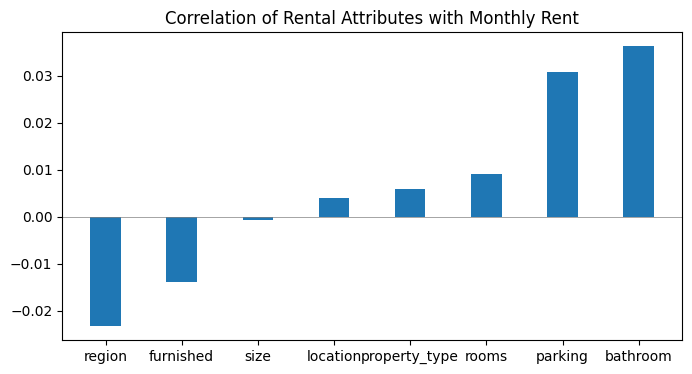

In [11]:
fig = plt.figure(figsize=(8,4))
X_axis = np.arange(8)

plt.bar(X_axis, corr[:-1], width=0.4)
plt.axhline(0, color='grey', linewidth='0.5')
plt.xticks(X_axis, corr.index.tolist()[:-1])
plt.title("Correlation of Rental Attributes with Monthly Rent")

Text(0.5, 1.0, 'Absolute Correlation of Rental Attributes with Monthly Rent')

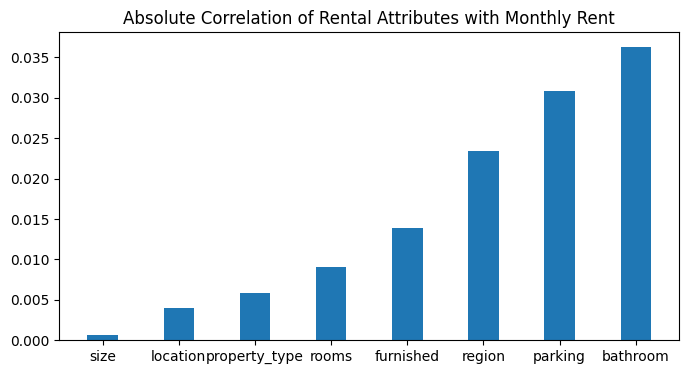

In [12]:
fig = plt.figure(figsize=(8,4))
X_axis = np.arange(8)

plt.bar(X_axis, abs_corr[:-1], width=0.4)
plt.axhline(0, color='grey', linewidth='0.5')
plt.xticks(X_axis, abs_corr.index.tolist()[:-1])
plt.title("Absolute Correlation of Rental Attributes with Monthly Rent")


The variables which have the highest impact on the monthly rent are region, furnished, parking and bathroom

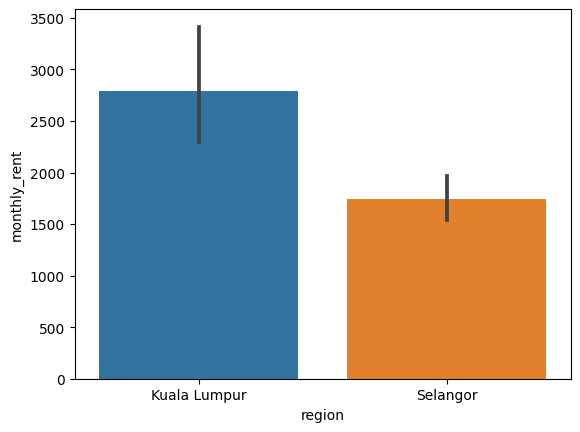

In [13]:
sns.barplot(x='region', y='monthly_rent', data=data_cat)
plt.show()

In [306]:
corr

region          -0.023360
furnished       -0.013868
size            -0.000658
location         0.004046
property_type    0.005835
rooms            0.009103
parking          0.030885
bathroom         0.036285
monthly_rent     1.000000
Name: monthly_rent, dtype: float64

[Text(0, 0.5, 'region'),
 Text(0, 1.5, 'furnished'),
 Text(0, 2.5, 'size'),
 Text(0, 3.5, 'location'),
 Text(0, 4.5, 'property_type'),
 Text(0, 5.5, 'rooms'),
 Text(0, 6.5, 'parking'),
 Text(0, 7.5, 'bathroom'),
 Text(0, 8.5, 'monthly_rent')]

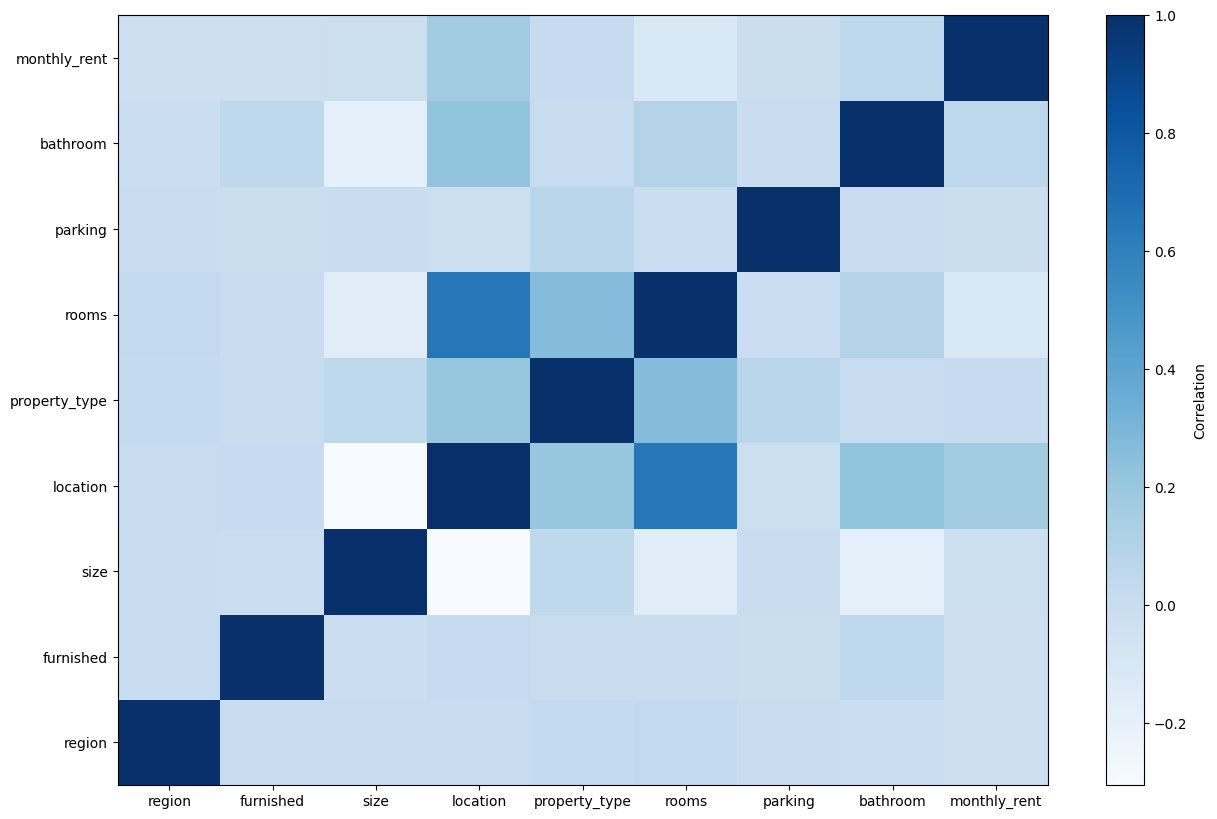

In [14]:
fig, ax = plt.subplots(figsize=(15,10))
plt.pcolor(data_codes.corr(), cmap=plt.cm.Blues)
plt.colorbar(label="Correlation", orientation="vertical")

ax.set_xticks(np.arange(9)+0.5)
ax.set_yticks(np.arange(9)+0.5)

ax.set_xticklabels(corr.index)
ax.set_yticklabels(corr.index)

In [15]:
selangor = copy.deepcopy(data[data['region']=="Selangor"])
kl = copy.deepcopy(data[data['region']=="Kuala Lumpur"])

In [19]:
temp = copy.deepcopy(data)

In [16]:
all_facilities = []
for i in range(data['facilities'].size):
    all_facilities.extend(data['facilities'][i].split(", "))

In [86]:
all_afac = []
for i in range(data['additional_facilities'].size):
    all_afac.extend(data['additional_facilities'][i].split(", "))

In [95]:
add_facilities = set(all_afac)
add_facilities.remove('')

In [17]:
facilities_set = set(all_facilities)
facilities_set.remove("6")
facilities_set.remove("10")
facilities_set.remove("11")

In [50]:
temp['facilities_list'] = temp['facilities'].str.split(", ")
temp['fac_num'] = temp['facilities_list'].str.len()

In [97]:
temp['afacilities_list'] = temp['additional_facilities'].str.split(", ")
temp['afac_num'] = temp['afacilities_list'].str.len()

In [55]:
temp = temp.assign(BBQ = lambda x: temp['facilities'].str.contains('Barbeque area'),
                   Club_House = lambda x: temp['facilities'].str.contains('Club house'),
                   Gym = lambda x: temp['facilities'].str.contains('Gymnasium'),
                   Jog = lambda x: temp['facilities'].str.contains('Jogging Track'),
                   Lift = lambda x: temp['facilities'].str.contains('Lift'),
                   Minimart = lambda x: temp['facilities'].str.contains('Minimart'),
                   MP_Hall = lambda x: temp['facilities'].str.contains('Multipurpose hall'),
                   No_Fac = lambda x: temp['facilities'].str.contains('None'),
                   Parking = lambda x: temp['facilities'].str.contains('Parking'),
                   Playground = lambda x: temp['facilities'].str.contains('Playground'),
                   Sauna = lambda x: temp['facilities'].str.contains('Sauna'),
                   Security = lambda x: temp['facilities'].str.contains('Security'),
                   Squash = lambda x: temp['facilities'].str.contains('Squash Court'),
                   Pool = lambda x: temp['facilities'].str.contains('Swimming Pool'),
                   Tennis = lambda x: temp['facilities'].str.contains('Tennis Court'),)

In [65]:
fac_cols = temp.columns.tolist()[11:]
fac_cols.remove('facilities_list')

In [68]:
for f in fac_cols:
    temp[f] = temp[f].astype('category').cat.codes

BBQ_Area
fac_num
BBQ
Club_House
Gym
Jog
Lift
Minimart
MP_Hall
No_Fac
Parking
Playground
Sauna
Security
Squash
Pool
Tennis


In [71]:
fac_corr = temp.corr()['monthly_rent']

C:\Users\danie\AppData\Local\Temp\ipykernel_14740\2795221690.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fac_corr = temp.corr()['monthly_rent']


In [84]:
temp

,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,facilities,additional_facilities,...,Minimart,MP_Hall,No_Fac,Parking,Playground,Sauna,Security,Squash,Pool,Tennis
0,4200,Taman Desa,Condominium,5,2.0,6.0,1842,Fully Furnished,"Minimart, Gymnasium, Security, Playground, Swi...","Air-Cond, Cooking Allowed, Washing Machine",...,1,1,0,1,1,0,1,0,1,0
1,2300,Cheras,Condominium,3,1.0,2.0,1170,Partially Furnished,"Playground, Parking, Barbeque area, Security, ...","Air-Cond, Cooking Allowed, Near KTM/LRT",...,0,0,0,1,1,1,1,0,1,0
2,1000,Taman Desa,Apartment,3,0.0,2.0,650,Fully Furnished,"Minimart, Jogging Track, Lift, Swimming Pool",None,...,1,0,0,0,0,0,0,0,1,0
3,1700,Sentul,Apartment,2,1.0,2.0,743,Partially Furnished,"Parking, Playground, Swimming Pool, Squash Cou...","Cooking Allowed, Near KTM/LRT, Washing Machine",...,1,0,0,1,1,0,1,1,1,0
4,1299,Mont Kiara,Service Residence,1,1.0,1.0,494,Not Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...",Air-Cond,...,1,1,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19981,1200,Kajang,Apartment,3.0,0.0,2.0,1000,Partially Furnished,"Security, Parking, Lift, Minimart, Multipurpos...",Near KTM/LRT,...,1,1,0,1,1,0,1,0,0,0
19982,1300,Bandar Saujana Putra,Service Residence,4.0,2.0,3.0,1427,Partially Furnished,"Jogging Track, Barbeque area, Playground, Swim...","Air-Cond, Cooking Allowed",...,0,0,0,0,1,1,0,0,1,1
19983,1350,Kajang,Condominium,3.0,2.0,2.0,1270,Partially Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...","Air-Cond, Cooking Allowed, Washing Machine",...,0,1,0,1,1,0,1,0,1,0
19984,1200,Cyberjaya,Service Residence,3.0,1.0,2.0,1100,Fully Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...","Cooking Allowed, Washing Machine",...,1,1,0,1,1,1,1,1,1,1


Text(0.5, 1.0, 'Absolute Correlation of Rental Attributes with Monthly Rent')

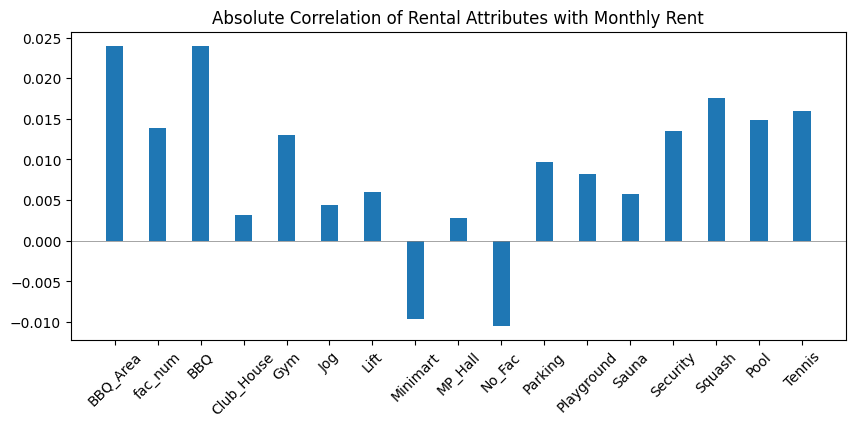

In [83]:
fig = plt.figure(figsize=(10,4))
X_axis = np.arange(len(fac_corr)-4)

plt.bar(X_axis, fac_corr[4:], width=0.4)
plt.axhline(0, color='grey', linewidth='0.5')
plt.xticks(X_axis, fac_corr.index.tolist()[4:], rotation=45)
plt.title("Absolute Correlation of Rental Attributes with Monthly Rent")